### Load datasets

In [1]:
from data.data_preparation import get_model_df, get_users_df, get_items_df
from model.model import RecommenderSystemModel
from utils import string_to_array, string_to_dict
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_interactions = pd.read_csv("data/results/2024-05-30_1/initial_interactions_1.csv")
df_items = pd.read_csv("data/results/2024-05-30_1/initial_items_1.csv", index_col="book_id")
df_items["vector"] = df_items["vector"].apply(string_to_array)
# df_users = pd.read_csv("data/results/2024-05-30_1/initial_users_1.csv", index_col="user_id")
# df_users["vector"] = df_users["vector"].apply(string_to_array)
# df_users["book_id"] = df_users["book_id"].apply(string_to_dict)

In [3]:
df_users = get_users_df(df_interactions, df_items, 50, [5, 20, 50], 50, True)

Getting users dataframe...
    - Users dataframe ready. Users: 150


In [4]:
df_users.head()

,is_reviewed,is_read,rating,book_id,ignorant,vector,read_proba,similarities,following
user_id,,,,,,,,,
8916,0,41,0.570909,"{536: 0.6214, 943: 0.3509, 1007: 0.3509, 1000:...",False,"[[19, 28, 17, 6, 5, 17, 19, 9, 29, 29, 29, 5, ...",0.70,"{278488: 0.911, 3974: 0.8814, 7673: 0.8799, 16...","[225902, 474410, 659623, 385760, 862034]"
26967,14,29,0.582222,"{1079: 0.2168, 21093: 0.4676, 1457: 0.7235, 25...",False,"[[9, 25, 10, 4, 7, 10, 9, 6, 27, 27, 27, 7, 7,...",0.70,"{14831: 0.932, 278488: 0.9303, 1182496: 0.9172...","[259263, 402878, 226944, 119589, 225902]"
39093,3,45,0.437500,"{58345: 0.6171, 7170: 0.4887, 24221: 0.423, 13...",False,"[[22, 39, 11, 11, 9, 11, 22, 13, 47, 47, 47, 9...",0.70,"{278488: 0.94, 14831: 0.9354, 7051: 0.9119, 69...","[147498, 87618, 119589, 253227, 803880]"
57096,0,32,0.380282,"{17239: 0.7605, 7323: 0.2018, 21422: 0.6813, 6...",False,"[[32, 22, 21, 21, 8, 21, 32, 20, 34, 34, 34, 8...",0.70,"{7673: 0.9067, 37034: 0.8854, 3974: 0.876, 854...","[385303, 195578, 200968, 649447, 739897]"
87105,2,3,0.042857,"{1687978: 0.8091, 519596: 0.3623, 581601: 0.81...",False,"[[9, 33, 4, 11, 4, 4, 9, 10, 31, 31, 31, 4, 4,...",0.05,"{14831: 0.953, 1182496: 0.9431, 7897: 0.9344, ...","[512120, 524976, 469134, 463361, 191253]"


In [4]:
rec_sys = RecommenderSystemModel(
    n_users=150, 
    steps=10, 
    ignorant_proportion=0.2,
    df=df_interactions,
    df_items=df_items,
    df_users=df_users,
    initial_store_path="data/results/2024-05-30_1",
    social_influence=True
)

Initializing model...

Creating user agents...
    - Users added
Creating item agents...
    - Items added
Finished model initialization!


In [5]:
rec_sys.run_model()

Step 10/10 executed.
df raw stored


In [35]:
results = pd.read_csv("data/results/2024-05-30_1/run_raw_1.csv")
user_results = results[(results["agent_type"] == "UserAgent") & (results["Step"] == 10)]
user_results["user_books_consumed"] = user_results["user_books_consumed"].apply(eval)

In [36]:
user_results["n_books_consumed"] = user_results["user_books_consumed"].apply(len)

In [47]:
user_results["n_books_consumed"].describe()

count    150.000000
mean       3.186667
std        2.897318
min        0.000000
25%        1.000000
50%        2.000000
75%        5.750000
max       10.000000
Name: n_books_consumed, dtype: float64

In [19]:
all_sums

max_position
0     187
1     666
2     167
3      36
4      80
5       0
6       0
7      54
8     300
9       0
10      0
11      0
12     71
13      0
14    146
Name: count, dtype: int64

In [5]:
df_users.head()

,is_reviewed,is_read,rating,book_id,vector
user_id,,,,,
2413,0.000000,114,0.823077,"{14859: 0.3099118836633818, 14839: 0.309911883...","[[34, 61, 25, 21, 9, 25, 34, 24, 66, 66, 66, 9..."
4856,0.000000,277,0.497003,"{1000: 0.3833610296025904, 66: 0.8355593997339...","[[109, 177, 90, 74, 50, 90, 109, 69, 200, 200,..."
16557,0.000000,87,0.449730,"{7433: 0.6174210974173361, 1001: 0.30633599935...","[[70, 74, 45, 52, 21, 45, 70, 30, 92, 92, 92, ..."
18936,0.041531,92,0.052563,"{6418: 0.23855851228023925, 6419: 0.3260143452...","[[384, 704, 345, 275, 160, 345, 384, 305, 775,..."
20075,0.119626,178,0.244112,"{87562: 0.3301209163883265, 51358: 0.813092850...","[[138, 238, 124, 110, 47, 124, 138, 118, 292, ..."


array([[<Axes: title={'center': 'fantasy'}>,
        <Axes: title={'center': 'non_fiction'}>,
        <Axes: title={'center': 'mystery'}>,
        <Axes: title={'center': 'young_adult'}>],
       [<Axes: title={'center': 'graphic'}>,
        <Axes: title={'center': 'thriller'}>,
        <Axes: title={'center': 'paranormal'}>,
        <Axes: title={'center': 'romance'}>],
       [<Axes: title={'center': 'history'}>,
        <Axes: title={'center': 'biography'}>,
        <Axes: title={'center': 'historical_fiction'}>,
        <Axes: title={'center': 'comics'}>],
       [<Axes: title={'center': 'poetry'}>,
        <Axes: title={'center': 'crime'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'fiction'}>]], dtype=object)

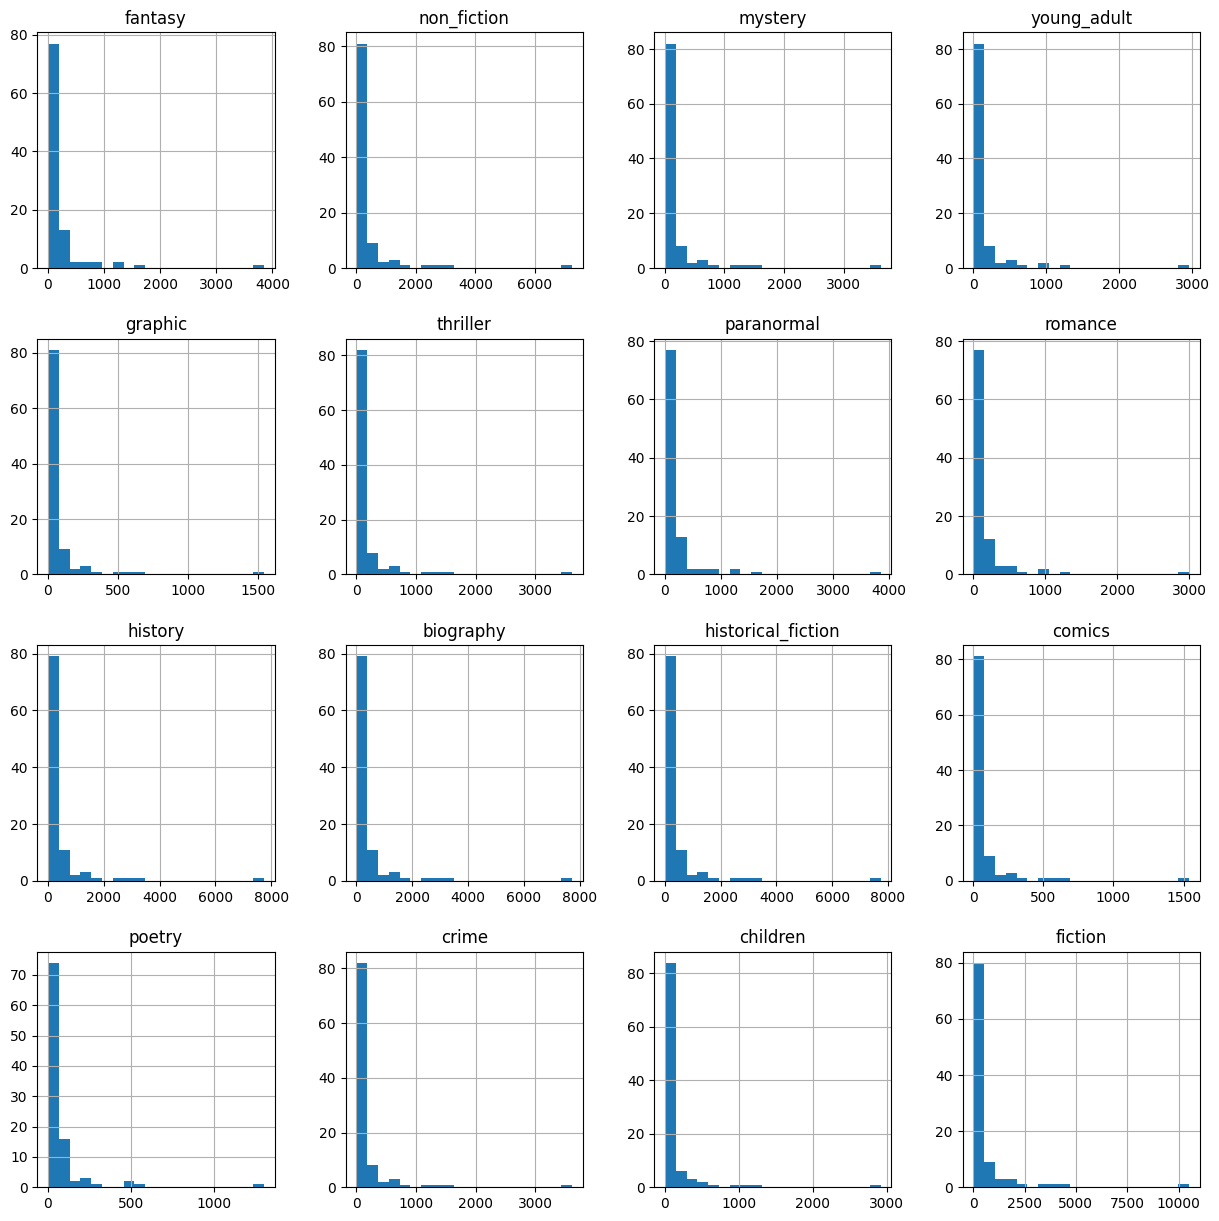

In [8]:
cat_cols = get_categories()
df_users[cat_cols].hist(bins=20, figsize=(15, 15))

In [2]:
rec_sys = RecommenderSystemModel(n_users=100, dummy=True)

Initializing model...

Loading data...
Dummy data read
Model dataframe ready. Interactions: 80167
Getting items dataframe...


/Users/javierus/Documents/Delft/Master Thesis/master_thesis/venv/lib/python3.12/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Items dataframe ready. Items: 45564
Getting users dataframe...
Users dataframe ready. Users: 100
Creating user agents...
Users added.
Creating item agents...
Items added.
Finished model initialization.


In [3]:
rec_sys.run_model()

Step 1 executed.
Step 2 executed.
Step 3 executed.
Step 4 executed.
Step 5 executed.
Step 6 executed.
Step 7 executed.
Step 8 executed.
Step 9 executed.
Step 10 executed.


In [4]:
d = rec_sys.datacollector.get_agent_vars_dataframe()

In [5]:
d.dropna(inplace=True)

In [6]:
d["vector"] = d["vector"].apply(lambda x: x[0])
expanded_df = d["vector"].apply(pd.Series)

In [7]:
odf = expanded_df.xs(34, level=1)
odf.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Step,,,,,,,,,,,,,,,,
1,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
2,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
3,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
4,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
5,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
6,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
7,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
8,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036
9,792,1332,714,585,323,714,792,558,1441,1441,1441,323,225,714,536,2036


In [11]:
odf[odf.index == 34]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
AgentID,,,,,,,,,,,,,,,,
34,794,1334,715,585,323,715,794,559,1443,1443,1443,323,225,715,536,2038


In [23]:
from model.agents import UserAgent

agents = [a for a in rec_sys.schedule.agents if isinstance(a, UserAgent)]
agent = agents[35]

In [9]:
import numpy as np
array = np.array([[1, 2, 3, 3, 3]])
print(np.ndarray.argmax(array))

2


In [2]:
from data.results import Results

r1 = Results()
r2 = Results()

Results directory created: 2024-04-11_1
Results directory created: 2024-04-11_2


In [1]:
import pandas as pd

df = pd.read_csv("/Users/javierus/Documents/Delft/Master Thesis/master_thesis/project/data/results/2024-04-24_3/initial_users_1.csv")

In [5]:
df["book_length"] = df["book_id"].apply(len)

<Axes: >

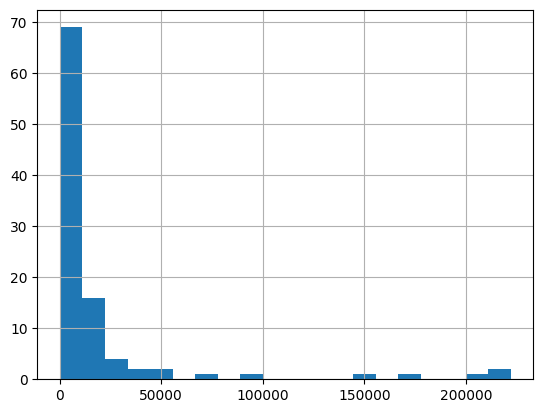

In [8]:
df["book_length"].hist(bins=20)

In [8]:
tmp_df = pd.read_csv("data/sensitivity/2024-06-05_37/initial_users_1.csv")
tmp_df["ignorant"].describe()

count       150
unique        1
top       False
freq        150
Name: ignorant, dtype: object

Standard deviation for max: 319.8186921262316
Coefficient of variation for max: 1.5125920999171463


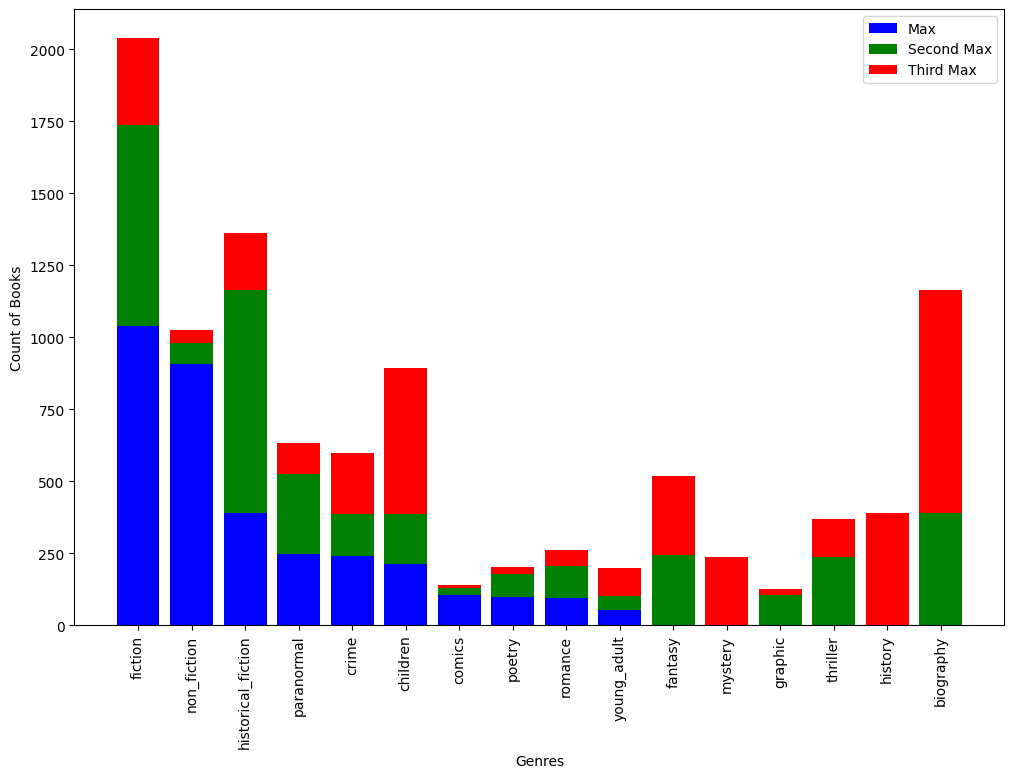

In [3]:
import pandas as pd
from utils import plot_book_distribution_by_genre

df_items = pd.read_csv("data/results/2024-06-06_01/initial_items_1.csv")
plot_book_distribution_by_genre(df_items, stats="max", filtered=False)

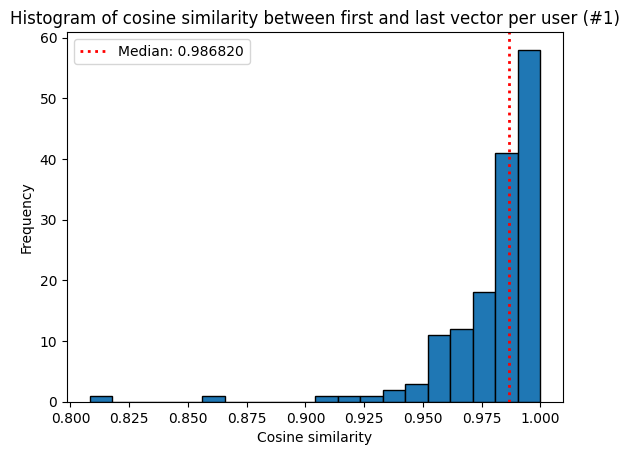

In [6]:
from utils import plot_vector_diffs, get_vector_diff_df

df1 = get_vector_diff_df("data/results/2024-06-06_01/run_raw_1.csv")

plot_vector_diffs(df1, "#1")

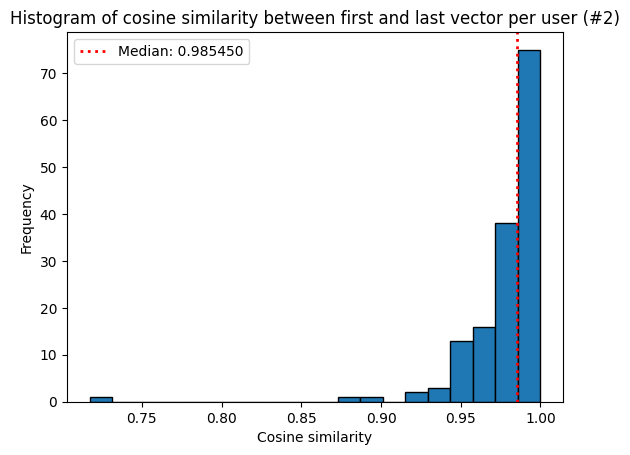

In [7]:
df2 = get_vector_diff_df("data/results/2024-06-06_02/run_raw_1.csv")

plot_vector_diffs(df2, "#2")

In [23]:
import ast
def get_books_read(df: pd.DataFrame) -> pd.DataFrame:
    df_filtered = df[df["agent_type"] == "UserAgent"]
    df_filtered["books_read"] = df_filtered["user_books_consumed"].apply(ast.literal_eval).apply(len)
    df_filtered = df_filtered.sort_values(by=["AgentID", "Step"])
    df_grouped = df_filtered.groupby("AgentID").last()["books_read"].reset_index()
    return df_grouped
df_items = pd.read_csv("data/results/2024-06-19_03/run_raw_1.csv")
df = get_books_read(df_items)
len(df)

/var/folders/3p/_plkqwx54p541zf82rnbzztm0000gn/T/ipykernel_33472/4068733841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["books_read"] = df_filtered["user_books_consumed"].apply(ast.literal_eval).apply(len)


150

In [32]:
import pandas as pd
import ast
import os
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df_items = pd.read_csv("data/results/2024-06-19_01/initial_items_1.csv")

def get_most_read_books(model):
    results = []
    base_path = "data/results"
    runs = sorted(os.listdir(base_path))
    runs.pop(0)
    if model == "benchmark":
        start = 0
        stop = 20
    elif model == "covert":
        start = 20
        stop = 40
    elif model == "overt":
        start = 40
        stop = 60
    elif model == "overt_w_si":
        start = 60
        stop = 80
    for i in range(start, stop):
        full_path = os.path.join(base_path, runs[i], "run_raw_1.csv")
        df = pd.read_csv(full_path)
        dff = df[df["agent_type"] == "UserAgent"]
        dff["user_books_consumed"] = dff["user_books_consumed"].apply(ast.literal_eval)
        dff = dff.sort_values(by=["AgentID", "Step"])
        dff_count = dff.groupby("AgentID").last()["user_books_consumed"].reset_index()["user_books_consumed"].explode().value_counts().reset_index()
        results.append(dff_count)
        print(i, end="\r")
    result = pd.concat(results)
    result = result.groupby("user_books_consumed")["count"].mean().reset_index().sort_values(by=["count"], ascending=False)
    return result

from utils import *

def top_indices(x):
    unique_values = np.unique(x)[::-1]
    top_indices = []
    cats = get_categories()
    for value in unique_values[:3]: 
        indices = np.where(x == value)
        top_indices.append(list(indices[0]))

    while len(top_indices) < 3:
        top_indices.append(None)
    
    return [[cats[index] for index in sublist] for sublist in top_indices]

In [33]:
rbb = get_most_read_books("benchmark")
rbb = rbb.sort_values(by=["count"], ascending=False)
top3b = rbb.head(3)["user_books_consumed"].tolist()
rbb.head()

,user_books_consumed,count
253,123504,84.60
306,799266,83.05
48,3974,79.10
268,189967,68.00
309,1019881,67.20


In [34]:
top3itemsb = df_items[df_items["book_id"].isin(top3b)]
top3itemsb["new"] = top3itemsb["vector"].apply(string_to_array).apply(lambda x: normalize_vector(x.flatten())).apply(top_indices)
top3itemsb.head()

,book_id,is_read,rating,is_reviewed,vector,priority,unique_id,new
327,3974,2,0.6,0,[[ 258. 8. 300. 0. 0. 300. 258. ...,0,478,"[[fiction], [history, biography, historical_fi..."
2583,123504,0,0.0,0,[[ 7. 0. 4. 0. 0. 4. 7. 1. 11. 11. 11. ...,0,2734,"[[fiction], [history, biography, historical_fi..."
3242,799266,0,0.0,0,[[2. 1. 1. 0. 0. 1. 2. 0. 2. 2. 2. 0. 0. 1. 0....,0,3393,"[[fiction], [fantasy, paranormal, history, bio..."


In [35]:
rbc = get_most_read_books("covert")
rbc = rbc.sort_values(by=["count"], ascending=False)
top3c = rbc.head(3)["user_books_consumed"].tolist()
rbc.head()

,user_books_consumed,count
1,205,141.45
2,218,136.95
3,228,130.35
4,229,121.50
6,915,115.40


In [36]:
top3itemsc = df_items[df_items["book_id"].isin(top3c)]
top3itemsc["new"] = top3itemsc["vector"].apply(string_to_array).apply(lambda x: normalize_vector(x.flatten())).apply(top_indices)
top3itemsc.head()

,book_id,is_read,rating,is_reviewed,vector,priority,unique_id,new
23,205,1,0.6,0,[[ 0. 0. 284. 0. 0. 284. 0. 0. 135....,0,174,"[[mystery, thriller, crime], [history, biograp..."
25,218,1,1.0,0,[[ 0. 0. 46. 0. 0. 46. 0. 0. 0. 0. 0. ...,0,176,"[[mystery, thriller, crime], [fiction], [fanta..."
26,228,0,0.0,0,[[ 0. 1. 37. 0. 0. 37. 0. 0. 0. 0. 0. ...,0,177,"[[mystery, thriller, crime], [fiction], [non_f..."


In [37]:
rbo = get_most_read_books("overt")
rbo = rbo.sort_values(by=["count"], ascending=False)
top3o = rbo.head(3)["user_books_consumed"].tolist()
rbo.head()

,user_books_consumed,count
284,123504,68.55
334,799266,68.40
55,3974,65.80
337,1019881,54.80
299,189967,53.60


In [38]:
top3itemso = df_items[df_items["book_id"].isin(top3o)]
top3itemso["new"] = top3itemso["vector"].apply(string_to_array).apply(lambda x: normalize_vector(x.flatten())).apply(top_indices)
top3itemso.head()

,book_id,is_read,rating,is_reviewed,vector,priority,unique_id,new
327,3974,2,0.6,0,[[ 258. 8. 300. 0. 0. 300. 258. ...,0,478,"[[fiction], [history, biography, historical_fi..."
2583,123504,0,0.0,0,[[ 7. 0. 4. 0. 0. 4. 7. 1. 11. 11. 11. ...,0,2734,"[[fiction], [history, biography, historical_fi..."
3242,799266,0,0.0,0,[[2. 1. 1. 0. 0. 1. 2. 0. 2. 2. 2. 0. 0. 1. 0....,0,3393,"[[fiction], [fantasy, paranormal, history, bio..."


In [39]:
rbow = get_most_read_books("overt_w_si")
rbow = rbow.sort_values(by=["count"], ascending=False)
top3ow = rbow.head(3)["user_books_consumed"].tolist()
rbow.head()

,user_books_consumed,count
73,14831,110.70
0,205,105.60
153,799266,102.55
135,123504,102.35
30,3974,98.95


In [47]:
top3itemsow = df_items[df_items["book_id"].isin(top3ow)]
top3itemsow["new"] = top3itemsow["vector"].apply(string_to_array).apply(lambda x: normalize_vector(x.flatten())).apply(top_indices)
top3itemsow.head()

,book_id,is_read,rating,is_reviewed,vector,priority,unique_id,new
23,205,1,0.6,0,[[ 0. 0. 284. 0. 0. 284. 0. 0. 135....,0,174,"[[mystery, thriller, crime], [history, biograp..."
886,14831,2,0.8,0,[[ 3. 20. 0. 0. 2. 0. 3. 2. 20. 20. 20. ...,0,1037,"[[non_fiction, history, biography, historical_..."
3242,799266,0,0.0,0,[[2. 1. 1. 0. 0. 1. 2. 0. 2. 2. 2. 0. 0. 1. 0....,0,3393,"[[fiction], [fantasy, paranormal, history, bio..."


In [54]:
k = top3itemsow.iloc[[1]]["new"]
for e in k:
    print(e)

[['non_fiction', 'history', 'biography', 'historical_fiction'], ['fiction'], ['fantasy', 'paranormal']]
